In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [17]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
import pandas as pd
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [18]:
df.describe()

Year   Recession  Consumer_Confidence  Seasonality_Weight  \
count   528.000000  528.000000           528.000000          528.000000   
mean   2001.500000    0.214015           101.140170            0.575795   
std      12.710467    0.410526            10.601154            0.454477   
min    1980.000000    0.000000            73.900000            0.000000   
25%    1990.750000    0.000000            94.035000            0.250000   
50%    2001.500000    0.000000           100.740000            0.500000   
75%    2012.250000    0.000000           108.240000            0.750000   
max    2023.000000    1.000000           131.670000            1.500000   

              Price  Advertising_Expenditure  Competition         GDP  \
count    528.000000               528.000000   528.000000  528.000000   
mean   24964.991956              3067.456439     6.064394   40.073903   
std     4888.073433              1139.564637     1.968350   16.249714   
min     8793.663000              1009.000000     3.000000   12.508000   
25%    21453.300500              2083.500000     4.000000   27.237500   
50%    25038.691500              3072.000000     6.000000   39.214500   
75%    28131.684750              4067.250000     8.000000   53.506500   
max    44263.657000              4983.000000     9.000000   70.374000   

       Growth_Rate  unemployment_rate  Automobile_Sales  
count   528.000000         528.000000        528.000000  
mean     -0.242001           2.453977       2352.718068  
std       0.861268           1.119019       1645.321284  
min      -4.227601           1.000000        102.000000  
25%      -0.574049           1.600000        793.950000  
50%      -0.013162           2.300000       2182.600000  
75%       0.388932           2.900000       3614.800000  
max       0.815074           6.000000      21147.000000

In [19]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

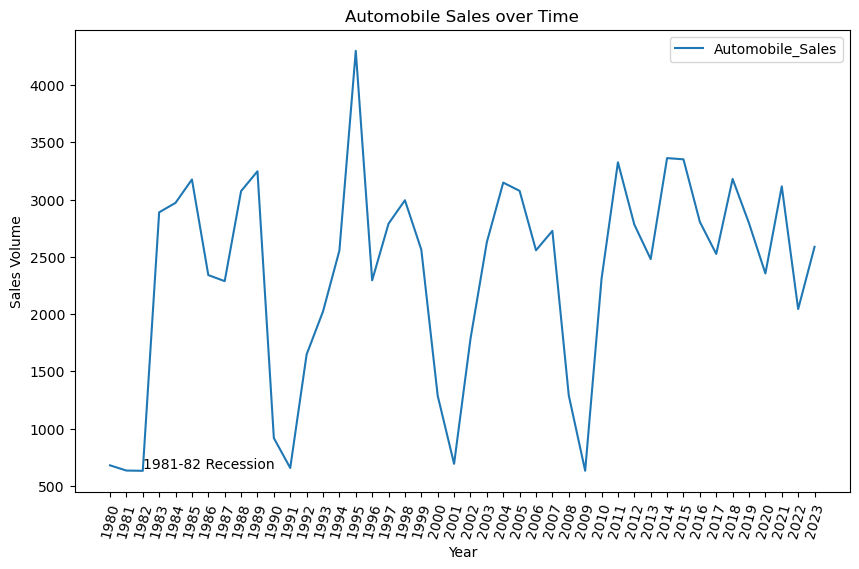

In [23]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()

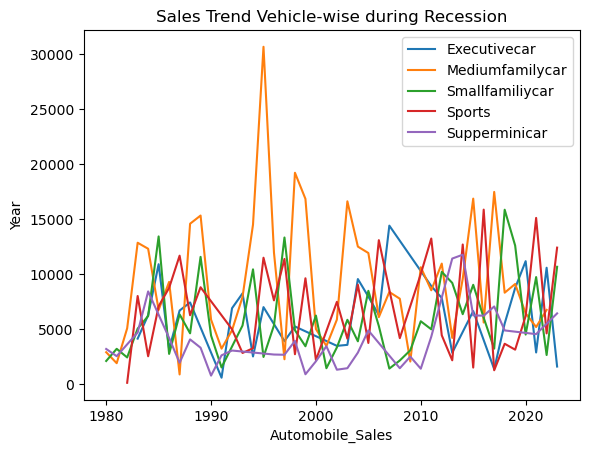

In [26]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Automobile_Sales')
plt.ylabel('Year')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

#### we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle. while sales of the superminicar and smallfamilycar increased.

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

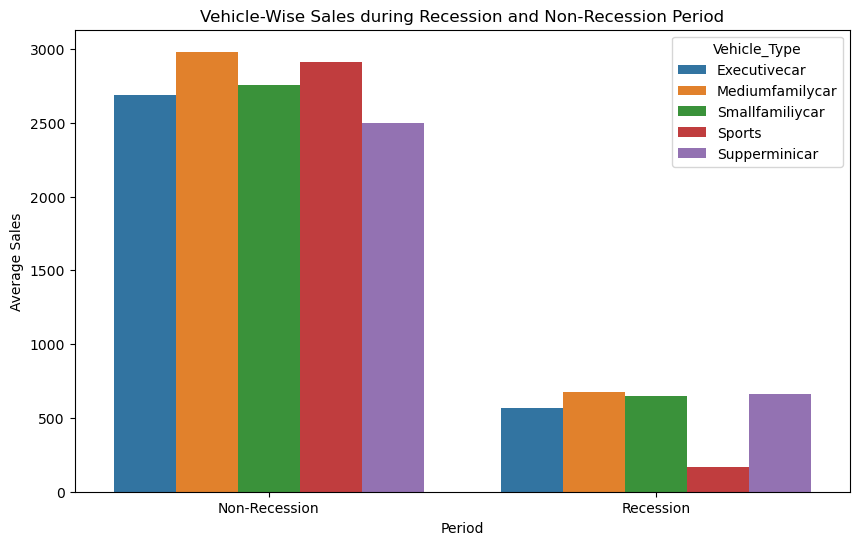

In [28]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

#### Sports cars took the biggest hit as even the ones who could afford them, chose not to in the times of recession. rest everone saw a consistent dip in the prices of the cars.

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

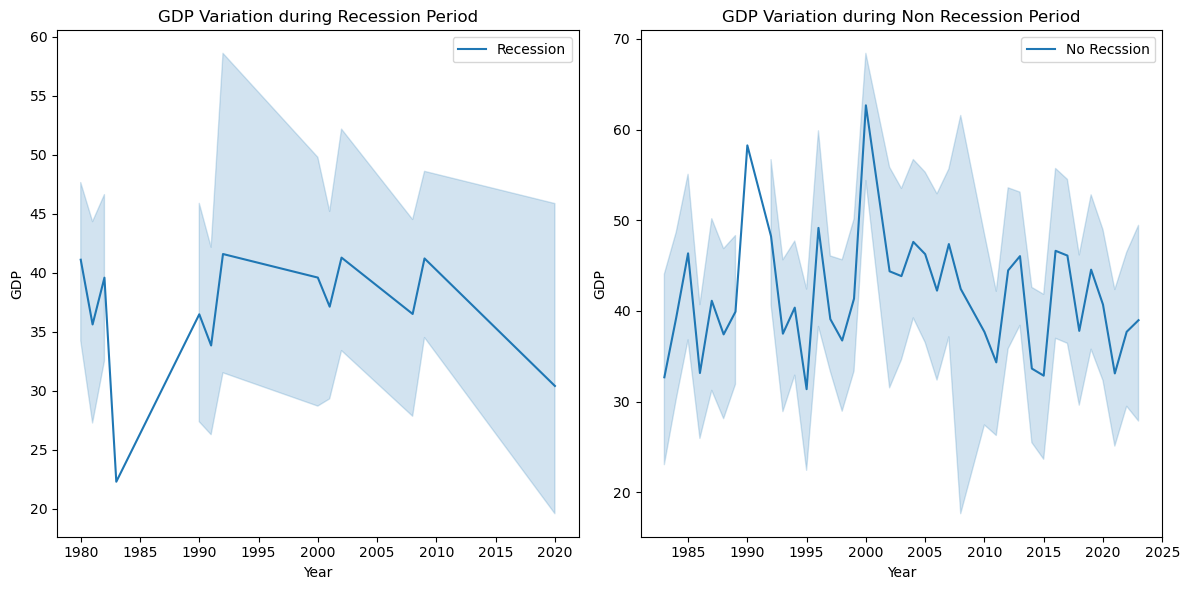

In [29]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
    #Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data = non_rec_data, label='No Recssion',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')
    
plt.tight_layout()
plt.show()


C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

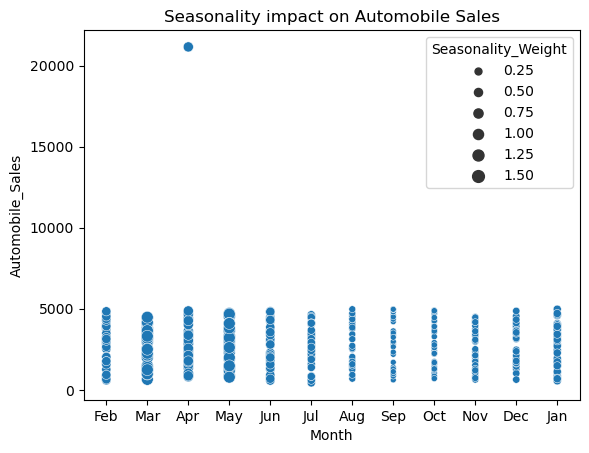

In [30]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

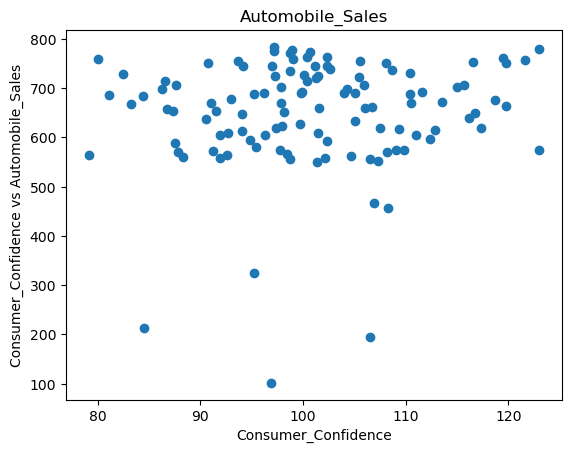

In [32]:
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('Consumer_Confidence')
    plt.ylabel('Consumer_Confidence vs Automobile_Sales')
    plt.title('Automobile_Sales')
    plt.show()

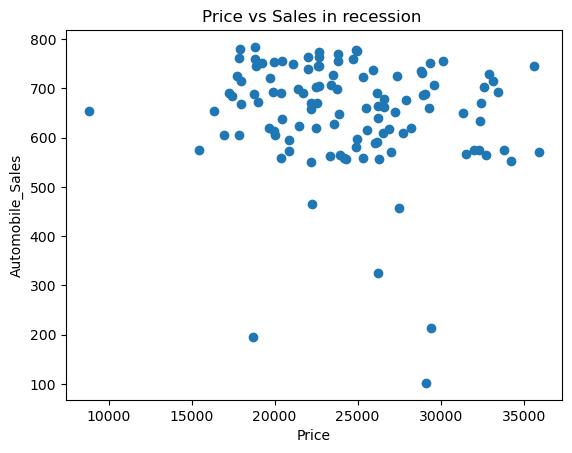

In [31]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Price vs Sales in recession ')
plt.show()

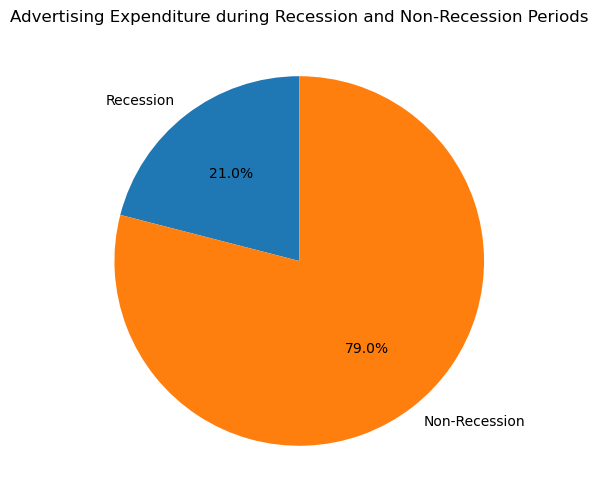

In [34]:
    # Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

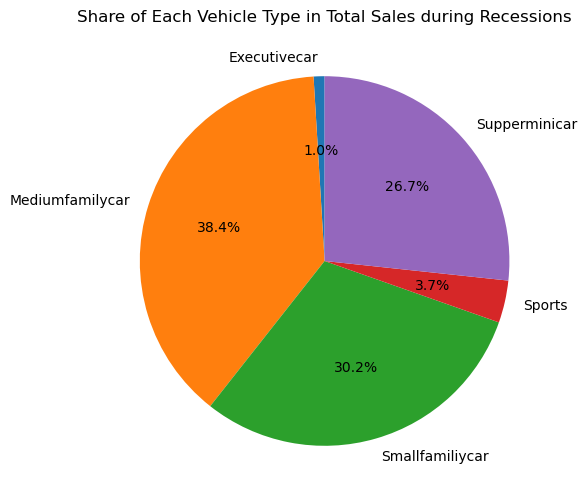

In [35]:
    # Filter the data 
Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

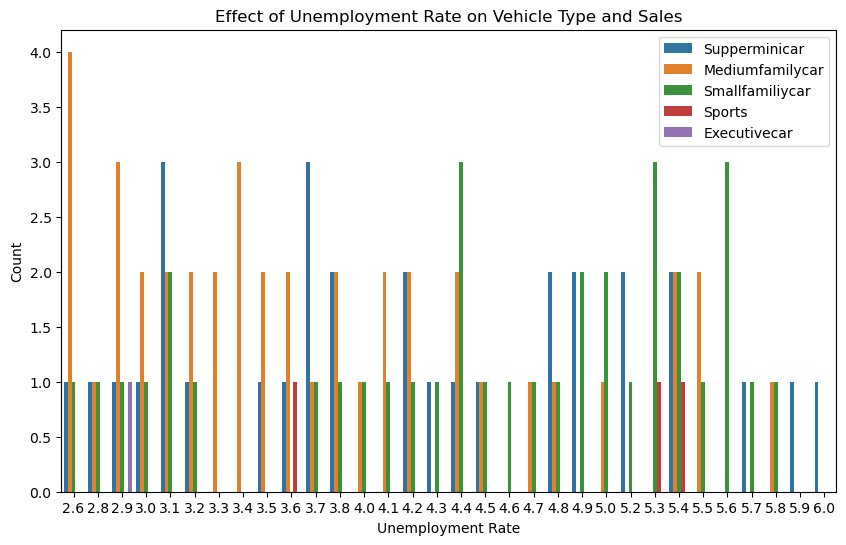

In [36]:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))
    
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

In [46]:
import requests 
import json

In [47]:
# URL of the JSON file you want to download
json_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"

# Specify the local filename you want to save
local_filename = "us-states.json"

# Download the JSON file
response = requests.get(json_url)

# Check if the download was successful (status code 200)
if response.status_code == 200:
    # Load JSON data
    json_data = response.json()

    # Save JSON data to a local file
    with open(local_filename, 'w') as json_file:
        json.dump(json_data, json_file)

    print(f"JSON file downloaded and saved as '{local_filename}'.")
else:
    print(f"Failed to download JSON file. Status code: {response.status_code}")


JSON file downloaded and saved as 'us-states.json'.


In [48]:
# Filter the data for the recession period and specific cities
recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

In [51]:
%pip install plotly
%pip install dash
%pip install dash-core-components
%pip install dash-html-components

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.2 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.2 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.2 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.2 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.2 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.2 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.2 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/10.2 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.2 MB 2.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/10.2 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/10.2 MB 3.7 MB/s eta 0:00:03
   ------- ------

In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, html, dcc, Input, Output, callback

In [53]:
url = 'https://raw.githubusercontent.com/marvin-rubia/US-Airlines-Analytics-Dashboard/main/airline_data.csv'

df = pd.read_csv(url)

# Check our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Columns: 110 entries, Unnamed: 0 to Div5TailNum
dtypes: float64(74), int64(19), object(17)
memory usage: 22.7+ MB


In [54]:
condition = (df['Year'] >= 2005) & (df['Year'] <= 2020)

airline_data = df[condition]

airline_data.head()

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1     1125375  2013        2      5          13          1  2013-05-13   
4     1888125  2017        3      8          17          4  2017-08-17   
5     1133769  2014        2      4           2          3  2014-04-02   
6     1465620  2011        3      8          15          1  2011-08-15   
7      172607  2019        1      1           6          7  2019-01-06   

  Reporting_Airline  DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline  \
1                EV                     20366                          EV   
4                UA                     19977                          UA   
5                AA                     19805                          AA   
6                WN                     19393                          WN   
7                EV                     20366                          EV   

   ... Div4WheelsOff  Div4TailNum  Div5Airport  Div5AirportID  \
1  ...           NaN          NaN          NaN            NaN   
4  ...           NaN          NaN          NaN            NaN   
5  ...           NaN          NaN          NaN            NaN   
6  ...           NaN          NaN          NaN            NaN   
7  ...           NaN          NaN          NaN            NaN   

   Div5AirportSeqID Div5WheelsOn Div5TotalGTime Div5LongestGTime  \
1               NaN          NaN            NaN              NaN   
4               NaN          NaN            NaN              NaN   
5               NaN          NaN            NaN              NaN   
6               NaN          NaN            NaN              NaN   
7               NaN          NaN            NaN              NaN   

   Div5WheelsOff Div5TailNum  
1            NaN         NaN  
4            NaN         NaN  
5            NaN         NaN  
6            NaN         NaN  
7            NaN         NaN  

[5 rows x 110 columns]

In [55]:
def compute_data_1(airline_data):
    ## Get different sets of data
    
    # For plot1
    tree_data = airline_data.groupby(['DestState', 'Reporting_Airline'])['Flights'].sum().reset_index()

    # For plot2
    condition = airline_data['DivAirportLandings'] != 0.0
    div_data = airline_data[condition]
  
    # For plot3
    map_data = airline_data.groupby('OriginState')['Flights'].sum().reset_index()

    # For plot4 
    bar_data = airline_data.groupby(['Month','CancellationCode'])['Flights'].sum().reset_index()
    
    # For plot5
    line_data = airline_data.groupby(['Month','Reporting_Airline'])['AirTime'].mean().reset_index()
    
    return tree_data, div_data, map_data, bar_data, line_data 

In [56]:
def compute_data_2(airline_data):
    ## Compute delay averages
    
    # For plot1
    avg_car = airline_data.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()

    # For plot2
    avg_weather = airline_data.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    
    # For plot3
    avg_NAS = airline_data.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    
    # For plot4
    avg_sec = airline_data.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    
    # For plot5
    avg_late = airline_data.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

In [59]:
# Create the Dash app
app = Dash(__name__)

# Create the app layout
app.layout = html.Div(style={'backgroundColor': 'lightblue', 'border': 'ridge', 'padding': '50px'}, children=[
                html.H1('US Domestic Airline Flights Performance [2005-2020]',
                       style={'textAlign': 'center', 'color': '#00008B', 
                             'font-size': 36}),
                
                # Dropdown creation for report_type      
                html.Div(style={'display': 'flex'},
                         children=[
                            html.H2('Choose Type of Report:', style={'white-space':'nowrap', 'font-size': 20}),
                            dcc.Dropdown(
                                 options=[{'label': 'Yearly Airline Performance Report', 'value':'Type1'},
                                          {'label': 'Yearly Airline Delay Report', 'value': 'Type2'}], 
                                 id='report_type_input',
                                 value='Type1',
                                 placeholder='Choose a report type.',
                                 style={'textAlign': 'center', 'width':'100%', 'padding':'2px', 'font-size': 26})
                                  ]
                         ),
        
                # Dropdown creation for year of interest
                html.Div(style={'display': 'flex'},
                         children=[
                            html.H2('Choose Year:', style={'white-space':'nowrap', 'font-size': 20}),
                            dcc.Dropdown(options=list(range(2005,2021)), 
                                 id='year_input',
                                 value='2020',
                                 placeholder='Choose a year.', 
                                 style={'textAlign': 'center', 'width':'100%', 'padding':'2px', 'font-size': 26})
                                 ]
                        ), 
    
                # Area for the graphs
                html.Div(dcc.Graph(id='plot1'), style={'border': 'ridge', 'padding': '10px', 
                                                       'backgroundColor': '#00008B'}),
                
                html.Div(style={'display': 'flex', 'justify-content': 'center'}, 
                         children=[
                            html.Div(dcc.Graph(id='plot2'), style={'border': 'ridge', 'padding': '10px', 'backgroundColor': '#00008B'}),
                            html.Div(dcc.Graph(id='plot3'), style={'border': 'ridge', 'padding': '10px', 'backgroundColor': '#00008B'})
                            ]
                         ),
    
                html.Div(style={'display': 'flex', 'justify-content': 'center'},
                         children=[
                            html.Div(dcc.Graph(id='plot4'), style={'border': 'ridge', 'padding': '10px', 'backgroundColor': '#00008B'},),
                            html.Div(dcc.Graph(id='plot5'), style={'border': 'ridge', 'padding': '10px', 'backgroundColor': '#00008B'})
                            ]
                         )
]
)

# Create callback decorator
@app.callback([Output(component_id='plot1', component_property='figure'),
           Output(component_id='plot2', component_property='figure'),
           Output(component_id='plot3', component_property='figure'),
           Output(component_id='plot4', component_property='figure'),
           Output(component_id='plot5', component_property='figure')],
           [Input(component_id='report_type_input', component_property='value'),
           Input(component_id='year_input', component_property='value')]
           )

# Create callback function
def get_graphs(report_type, year):
    condition = airline_data['Year'] == int(year)
    data = airline_data[condition]
    
    # If report type 1 is chosen:
    if report_type == 'Type1':
        # Get plotting data
        tree_data, div_data, map_data, bar_data, line_data = compute_data_1(data)
        
        # Tree map
        tree_fig = px.treemap(tree_data, path=[px.Constant('United States'), 'DestState', 'Reporting_Airline'], values='Flights', 
                              color='Flights', color_continuous_scale='RdBu', title='Flights by Airlines Going to a Destination State')
        tree_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        # Pie graph
        pie_fig = px.pie(div_data, values='Flights', names='Reporting_Airline', title='% of Diverted Landings by Airline')
        pie_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        # Choropleth map
        map_fig = px.choropleth(map_data,
                                locations='OriginState', 
                                color='Flights',  
                                hover_data=['OriginState', 'Flights'], 
                                locationmode = 'USA-states', # Set to plot as US States
                                color_continuous_scale='GnBu',
                                range_color=[0, map_data['Flights'].max()])
        
        map_fig.update_layout(title_text = 'Number of Flights from Origin State', geo_scope='usa', 
                             title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style') # Plot only the USA instead of globe)
        
        # Bar graph
        bar_fig = px.bar(bar_data, x='Month', y='Flights', color='CancellationCode', title='Monthly Flight Cancellation')
        bar_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
          
        # Line graph
        line_fig = px.line(line_data, x='Month', y='AirTime', color='Reporting_Airline', title='Monthly Airtime Per Airline')
        line_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
          
        return [tree_fig, pie_fig, map_fig, bar_fig, line_fig]
    
    # If report type 2 is chosen:
    elif report_type == 'Type2':
        avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_data_2(data)
        
        # Create line graphs
        carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average Carrrier Delay Time (minutes) by Airline')
        carrier_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average Weather Delay Time (minutes) by Airline')
        weather_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS Delay Time (minutes) by Airline')
        nas_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average Security Delay Time (minutes) by Airline')
        sec_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average Late Aircraft Delay Time (minutes) by Airline')
        late_fig.update_layout(title_x=0.5, font=dict(size=18), title_font_family='Bookman Old Style')
        
        return [carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]

# Run the app and open it a new tab
if __name__ == '__main__':
    app.run(jupyter_mode='tab') 
    # The jupyter_mode parameter is only possible within Jupyter environment

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>